**Proyecto primer corte Machine Learning**

***Miguel Ángel Beltrán Barrantes***

Sobrevivientes del titanic

In [ ]:
#Se conecta con google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Librerias utilizadas**

In [ ]:
import numpy as np
np.random.seed(0)
import random
random.seed(0)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
#Se carga el archivo .csv desde el drive
titanic=pd.read_csv('/content/drive/MyDrive/Machine Learning/datasets/Titanic-Dataset.csv')
titanic_c=titanic.copy() #Se realiza una copia del dataset para poder realizar
#los cambios pertientes sin afectar los datos originales

**ANÁLISIS EXPLORATORIO DE DATOS**

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
titanic['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [ ]:
titanic['Cabin'].value_counts(normalize=True)

B96 B98        0.019608
G6             0.019608
C23 C25 C27    0.019608
C22 C26        0.014706
F33            0.014706
                 ...   
E34            0.004902
C7             0.004902
C54            0.004902
E36            0.004902
C148           0.004902
Name: Cabin, Length: 147, dtype: float64

In [ ]:
titanic['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas

numerical_columns = titanic.select_dtypes(include=numeric_types).columns.tolist() # Put in a list the features with numerical format.

numerical_columns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
ti_class_m=titanic['Age'].mean()
ti_class_std=titanic['Age'].std()
print("Promedio: ", ti_class_m)
print("Desviación Estándar: ", ti_class_std)

Promedio:  29.69911764705882
Desviación Estándar:  14.526497332334042


In [ ]:
from sklearn.impute import SimpleImputer  # sklearn class to impute missing data

num_impute = SimpleImputer(strategy='mean')  # could be mean or median for numerical values

print(titanic['Age'].head())  # show the first 5 values before imputing

print(f"\n\nMean of Age column is {titanic['Age'].mean()}\n\n") # Print the "mean" value of data

print(num_impute.fit_transform(titanic[['Age']])[:5])  # transforming turns the column into a numpy array. Only for visualization.

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


Mean of Age column is 29.69911764705882


[[22.]
 [38.]
 [26.]
 [35.]
 [35.]]


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.3 MB/s eta 0:00:00


<Axes: title={'center': 'Clases de los pasajeros'}, ylabel='Frequency'>

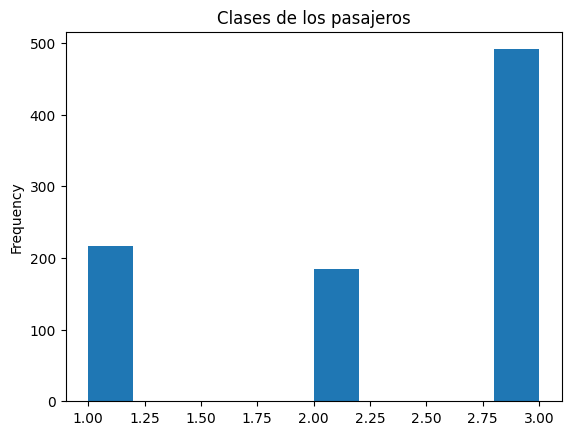

In [ ]:
from feature_engine.imputation import EndTailImputer
titanic['Pclass'].plot(
    title='Clases de los pasajeros', kind='hist'
) # Histogram before imputing

<Axes: title={'center': 'Promedio de edad'}, ylabel='Frequency'>

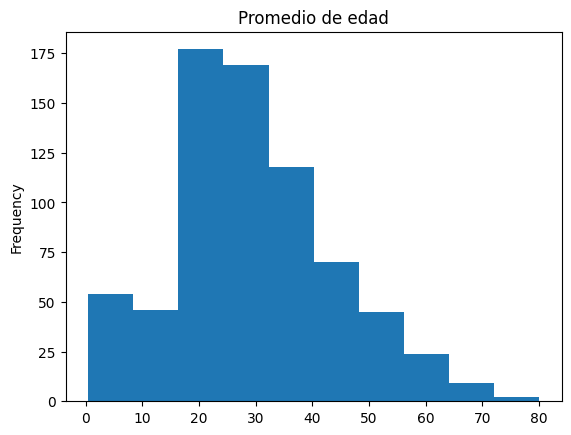

In [ ]:
from feature_engine.imputation import EndTailImputer
titanic['Age'].plot(
    title='Promedio de edad', kind='hist', xlabel='edad'
) # Histogram before imputing

**Transformación Logaritmica**

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

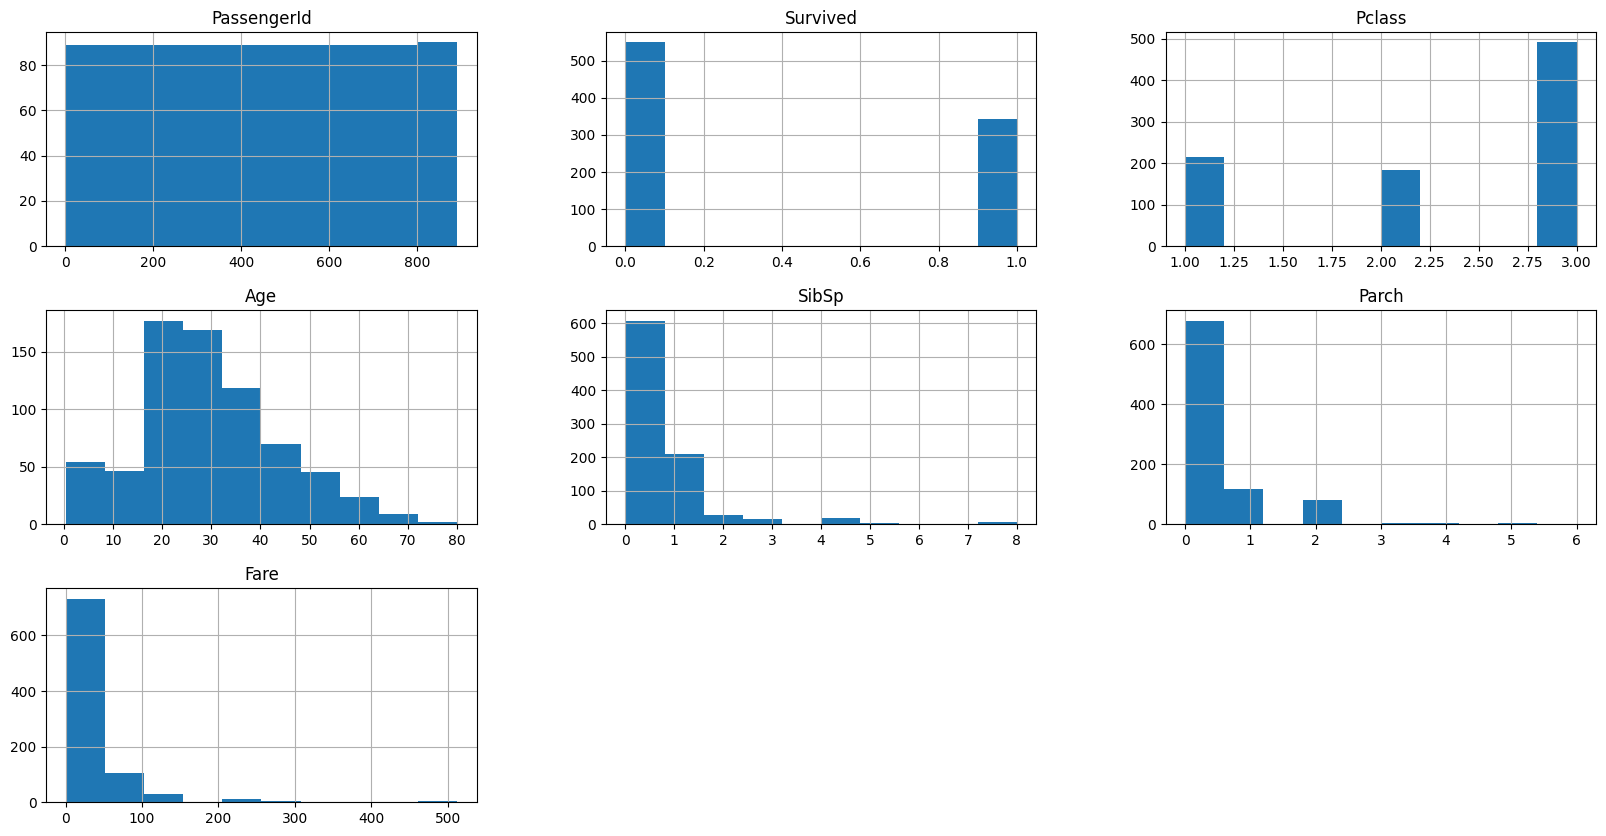

In [ ]:
titanic[numerical_columns].hist(figsize=(20,10))

<Axes: >

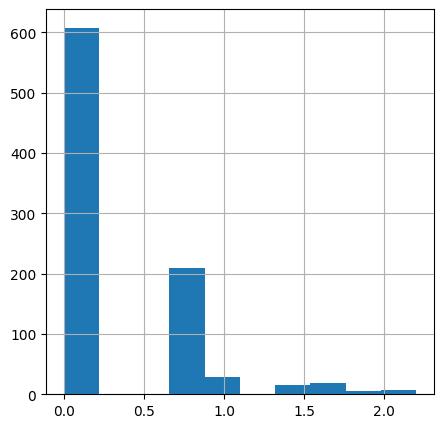

In [ ]:
titanic['SibSp'].map(np.log1p).hist(figsize=(5,5))

<Axes: title={'center': 'Numero de hermanos (Log Tranformed)'}, ylabel='Frequency'>

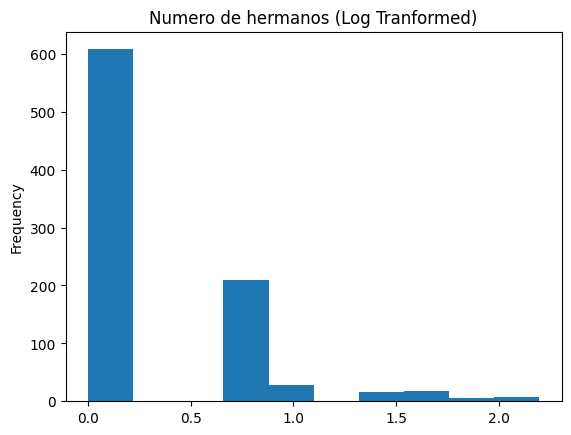

In [ ]:
titanic['SibSp'].map(np.log1p).plot(
    title='Numero de hermanos (Log Tranformed)', kind='hist'
)

**Feature Scaling**

In [ ]:
titanic[numerical_columns].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

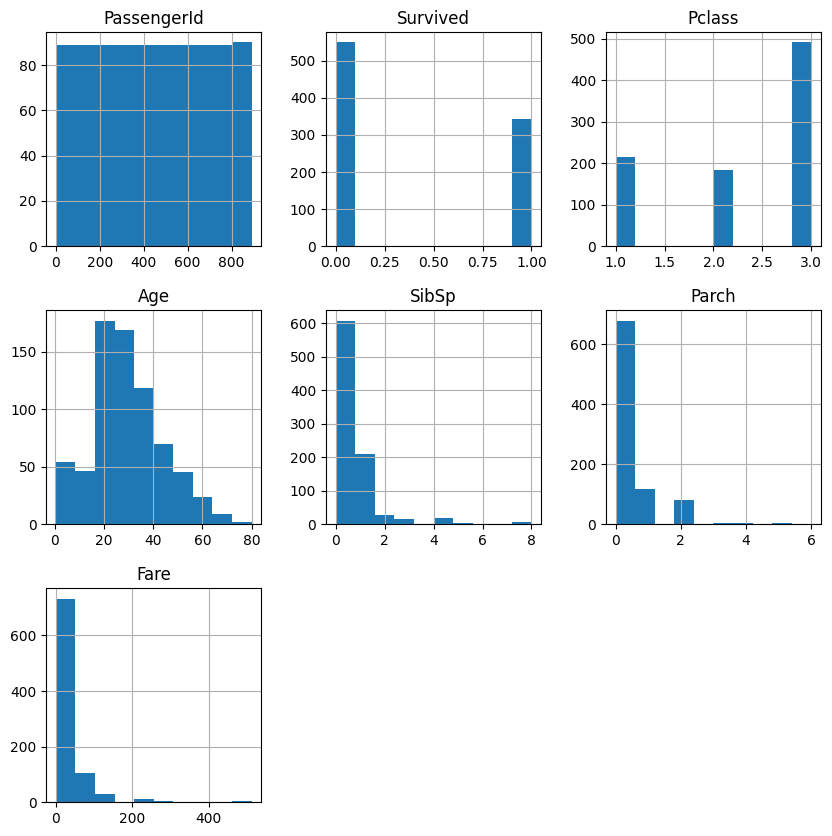

In [ ]:
titanic[numerical_columns].hist(figsize=(10,10))

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

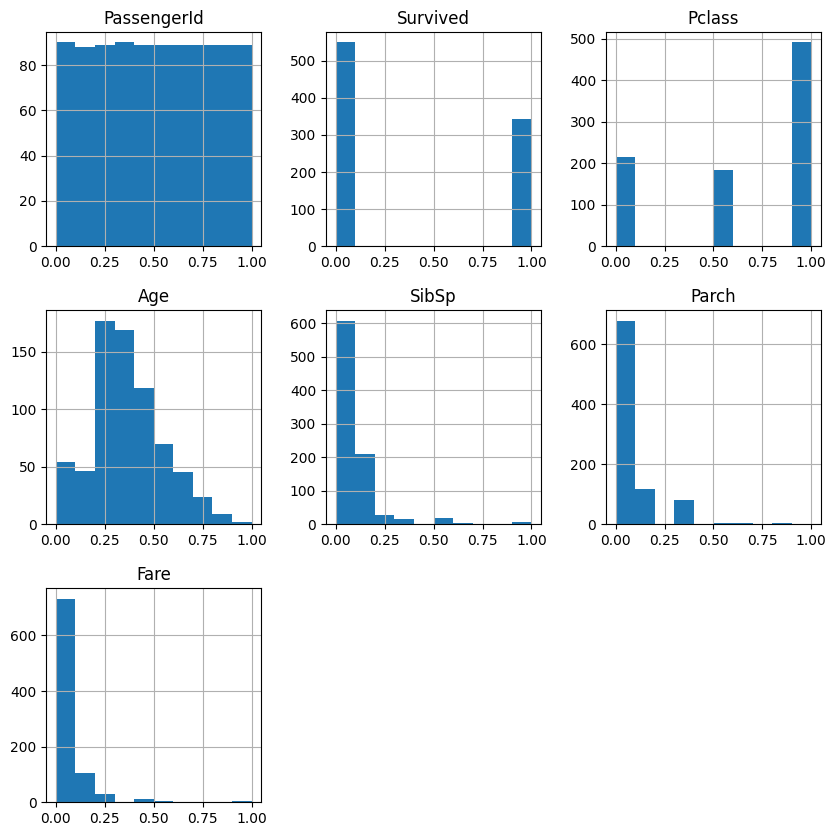

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    MinMaxScaler().fit_transform(titanic[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10))

In [ ]:
from sklearn.preprocessing import StandardScaler

pd.DataFrame(  # mean of 0 and std of 1 but ranges are different (see min and max)
    StandardScaler().fit_transform(titanic[numerical_columns]),
    columns=numerical_columns
).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,3.987333e-17,-8.772133e-17,2.388379e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000701e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,-2.016979e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,-6.595416e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-7.892723e-01,8.273772e-01,-1.170488e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,8.650540e-01,1.266990e+00,8.273772e-01,5.718310e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.730108e+00,1.266990e+00,8.273772e-01,3.465126e+00,6.784163e+00,6.974147e+00,9.667167e+00


In [ ]:
pd.DataFrame(  # mean and std are different but min and max are 0s and 1s
    MinMaxScaler().fit_transform(titanic[numerical_columns]),
    columns=numerical_columns
).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Construcción de datos tipo categorico**

In [ ]:
categorical_types = ['O'] # The "object" type in pandas
categorical_columns = titanic.select_dtypes(include=categorical_types).columns.tolist() # List of categorical features
#categorical_columns.remove('Diagnosis') # Remove the output
for categorical_column in categorical_columns:
  print('=======')
  print(categorical_column)
  print('=======')
  print(titanic[categorical_column].value_counts(dropna=False))

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              

In [ ]:
titanic['Male'] = titanic['Sex'] == 'male'

In [ ]:
titanic['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
titanic['Male'].head()

0     True
1    False
2    False
3    False
4     True
Name: Male, dtype: bool

In [ ]:
binary_features = [  # aggregate all binary columns in a list
    'Survived'
]

In [ ]:
binary_features

['Survived']

In [ ]:
titanic['S']= titanic['Survived'] == 1

In [ ]:
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
titanic['S'].head()

0    False
1     True
2     True
3     True
4    False
Name: S, dtype: bool

In [ ]:
for categorical_column in categorical_columns:
  print('=======')
  print(categorical_column)
  print('=======')
  print(titanic[categorical_column].value_counts(dropna=False))

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              

In [ ]:
#del titanic['Sex']

In [ ]:
#del titanic['Name']

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False


In [ ]:
titanic.loc[(titanic["Pclass"] <= 1), "new_class"]  = "Rich"
titanic.loc[(titanic["Pclass"] >= 2), "new_class"] = "Medium"
titanic.loc[(titanic["Pclass"] >= 3), "new_class"] = "Poor"

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,S,new_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,Poor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,Rich
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,Poor
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,Rich
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,Poor


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class DummifyClassTicket(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None

    def parse_class_tickets(self, comma_sep_factors):
        ''' Rich,Medium,Poor -> ['Rich', 'Medium', 'Poor'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []

    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_class_tickets))  # create dummy variable for each class ticket
        return self

    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_class_tickets))

In [ ]:
drf = DummifyClassTicket()

ClassTickets = drf.fit_transform(titanic['new_class']) # It is applied one-hot enconding to the column called "ClassTickets"

print(ClassTickets.shape)

pd.DataFrame(ClassTickets, columns=drf.label_binarizer.classes_)

(891, 3)


,medium,poor,rich
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
886,1,0,0
887,0,0,1
888,0,1,0
889,0,0,1


In [ ]:
titanic['Survived'].replace({1: 'Survived', 0: 'No survived'})

0      No survived
1         Survived
2         Survived
3         Survived
4      No survived
          ...     
886    No survived
887       Survived
888    No survived
889       Survived
890    No survived
Name: Survived, Length: 891, dtype: object

**BUILDING OUR FEATURE ENGINEERING PIPELINE**

In [ ]:
from sklearn.model_selection import train_test_split

X, y = titanic.drop(['S'], axis=1), titanic['S']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [ ]:
y_train.value_counts(normalize=True)

False    0.616573
True     0.383427
Name: S, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

False    0.614525
True     0.385475
Name: S, dtype: float64

In [ ]:
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

# deal with Class Tickets

class_ticket_pipeline = Pipeline(
    [
        ('select_class_ticket', FunctionTransformer(lambda df: df['new_class'])),
        ('dummify', DummifyClassTicket())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns and scale them using MinMaxScaler

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
        ('scale', MinMaxScaler())  # Scale numerical features to a specific range
    ]
)


In [ ]:
def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.02 seconds
Training took 11.52 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 11.53 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, class_ticket_pipeline)

Parsing took 0.01 seconds
Training took 11.33 seconds
              precision    recall  f1-score   support

       False       0.69      0.85      0.76       110
        True       0.63      0.39      0.48        69

    accuracy                           0.68       179
   macro avg       0.66      0.62      0.62       179
weighted avg       0.67      0.68      0.66       179

Overall took 11.34 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
simple_grid_search(x_train, y_train, x_test, y_test, binary_pipeline)

Parsing took 0.01 seconds
Training took 10.27 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 10.28 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [ ]:
simple_fe = FeatureUnion([  # put all of our features together
    ('ClassTickets', class_ticket_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.03 seconds
Training took 10.20 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 10.20 seconds


In [ ]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='mean')),  # try mean instead of median
        ('scale', StandardScaler())  # scale our numerical features
    ]
)

simple_fe = FeatureUnion([
    ('ClassTickets', class_ticket_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# gained some precision for the COVID class
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.02 seconds
Training took 11.28 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 11.29 seconds


In [ ]:
'''
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('box-cox', PowerTransformer(method='box-cox', standardize=True)),
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('min_max_scale', MinMaxScaler()),  # Add MinMaxScaler here
        ('end_of_tail', EndTailImputer(imputation_method='gaussian'))
    ]
)
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)
'''

"\nfrom sklearn.preprocessing import FunctionTransformer, MinMaxScaler, PowerTransformer\nfrom sklearn.pipeline import Pipeline, FeatureUnion\nnumerical_pipeline = Pipeline(\n    [\n        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),\n        ('box-cox', PowerTransformer(method='box-cox', standardize=True)),\n        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe\n        ('min_max_scale', MinMaxScaler()),  # Add MinMaxScaler here\n        ('end_of_tail', EndTailImputer(imputation_method='gaussian'))\n    ]\n)\nbest_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)\n"

**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

class_ticket_pipeline = Pipeline(  # add feature selection
    [
        ('ClassTickets', FunctionTransformer(lambda df: df['new_class'])),
        ('dummify', DummifyClassTicket()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=3)),  # feature selection based on mutual information
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', class_ticket_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds
Training took 11.39 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 11.40 seconds


In [ ]:
from sklearn.feature_selection import chi2

class_ticket_pipeline = Pipeline(  # add feature selection
    [
        ('select_class_ticket', FunctionTransformer(lambda df: df['new_class'])),
        ('dummify', DummifyClassTicket()),
        ('chi2', SelectKBest(chi2, k='all'))  # use chi2 to select features
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', class_ticket_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds
Training took 10.45 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 10.46 seconds


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

class_ticket_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['new_class'])),
        ('dummify', DummifyClassTicket()),
        # use a decision tree classifier to select features
        ('tree_selector', SelectFromModel(max_features=3, estimator=DecisionTreeClassifier()))
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', class_ticket_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# let's stop here
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds
Training took 10.29 seconds
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       110
        True       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Overall took 10.30 seconds
